<a href="https://colab.research.google.com/github/annettembeyu/Analysis-of-Hypothyrodism-/blob/main/Hypothyrodism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyrodism Analysis in Nairobi Hospital Clinical Camp

# Defining the question

### a) Specifying the Data Analytic Question

To determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

The analysis will be considered achieved its objective when:

*   correct identification of patients with hypothyroid
*   comparison of machine learning models in determining patients with hypotyroid. The models that I will use are:
          1. Decision Tree
          2. SVM

### c) Understanding the context 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.The dataset will be used to accomplish the following:  
**Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

The analysis will be approached as follows:

**Approach 1: Decision trees**:
- Make a prediction using decision tree on whether the patient has hypothyroid or not  using at least 2 out of the 3 advanced models namely:
        i. Random forests
       ii. Ada boosted trees
      iii. gradient boosted trees.
- Optimize each of the above models and document how the hyperparameters were set up.
- Identify which of the models I trust most(on the basis of accuracy), and using the model  determine which features are most impactful in influencing the prediction
- Note: Wwith decision trees, a lot of data cleaning is not needed. 


**Approach 2: SVM:**

- With this model, data cleaning is a little bit so as to make sense of the features.

- I will document what transformation I have done on the data.

- I will apply Polynomial, linear and rbf kernel function to build my SVM model and then evaluate their performance and pick the kernel that performs the best. I will tune my parameters to improve the performance of the model and further visualize the models. I will use any two features to build the models for this step.

**Point to note:** I will use decision trees to obtain the most preferable features. However, these features obtained by decision tree might not be suitable for SVM hence I will graph them first.

-  After getting the  best performing kernel, I will use it together with the tuned parameters and repeat the prediction but this time using additional features. I will then compare the model you've just created with the 2-features version. 

### d) Recording the Experimental Design

*   Importing the necessary libraries and checking the data
*   External Data Source Validation
*   Exlporatory Data Analysis
*   Implementing the solution

### e) Data Relevance


The dataset can be downloaded from [Link](http://bit.ly/hypothyroid_data).

The description of the attributes contained in the dataset is as shown below:

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH: thyroid-stimulating hormone .
* T3_measured
* T3:triiodothyronine.
* TT4_measured
* TT4: The primary hormone produced and secreted by the thyroid gland. In treating hypothyroidism, thyroxine.

The data contains all the metrics that are relevant in determining whether a patient has hypothyroid or not.

## Importing the libraries and checking the Data

In [1]:
# Importing the relevant packages

import os
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading the dataset
# previewing the first rows of the dataset
hypo_df = pd.read_csv("hypothyroid.csv")
hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# preview the last rows of the dataset
hypo_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# Checking the shape of the data
hypo_df.shape

(3163, 26)

In [5]:
# checking whether the attributes have the appropriate datatype
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
# checking the columns heads
hypo_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
# getting an over view of the dataset
hypo_df.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


The question marks alongside the attributes in the output above is an indication of missing values in the dataset.

In [8]:
# changing the datatype for the numeric from object
hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']] = hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].apply(pd.to_numeric, errors='coerce')

In [9]:
# checking that the change of the data type was effected
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [10]:
# a preview of the statistical summaries for the numeric attributes
hypo_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [11]:
# Determining the no. of records in our dataset
#
print(hypo_df.shape)
print(hypo_df.columns)

(3163, 26)
Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')


In [12]:
hypo_df.isna().any()

status                       False
age                           True
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                           True
T3_measured                  False
T3                            True
TT4_measured                 False
TT4                           True
T4U_measured                 False
T4U                           True
FTI_measured                 False
FTI                           True
TBG_measured                 False
TBG                           True
dtype: bool

In [13]:
# Checking for missing values 
#
hypo_df.isnull().sum()
#

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There are quite a number of missing vaues which will be dealt with.

In [14]:
# Checking for duplicates
hypo_df.duplicated().any()

True

In [15]:
# getting a preview of the first rows of the duplicated data
#
hypo_df[hypo_df.duplicated()].head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.8,y,53.0,y,0.86,y,61.0,n,NaN
66,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0,n,NaN
124,hypothyroid,77.0,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.5,y,33.0,y,0.67,y,49.0,n,NaN
128,hypothyroid,79.0,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.6,y,47.0,y,0.97,y,48.0,n,NaN
131,hypothyroid,50.0,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,NaN,y,55.0,y,0.93,y,60.0,n,NaN


In [16]:
# checking for the number of duplicated values
hypo_df.duplicated().value_counts()

False    3086
True       77
dtype: int64

There are 77 duplicates.

In [17]:
# Removing the duplicates and keeping every first data point of the duplicated datapoints
#
hypo_df.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
hypo_df.duplicated().any()

False

The duplicates have been eliminated.

In [18]:
# Checking the unique values 
#
hypo_df.age.unique()

array([72., 15., 24., 77., 85., 64., 20., 42., 69., 75., 53., 59., 68.,
       50., 78., 65., 28., 43., 40., 84., nan, 83., 63., 73., 36., 27.,
       48., 71., 60., 34., 79., 62., 74., 32., 41., 70., 29.,  5., 58.,
       35., 51., 22., 16., 44., 39., 47., 18., 17., 88., 56., 30., 45.,
       66., 52., 54., 80., 33., 38., 92., 67., 46., 13., 89., 61., 49.,
       26., 57., 31., 90., 81., 25., 37., 76., 87., 23., 55., 86., 98.,
       21., 97.,  1.,  6., 14., 82., 11., 19.,  9., 12., 10.,  8.,  7.,
        4., 93.])

In [19]:

# changing the column heads to have the same sentence case
#
hypo_df.columns = hypo_df.columns.str.lower()

# Previewing the columns to check the changes
hypo_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [20]:
# Checking for the number of unique values in each column
#
for column in hypo_df.columns:
  print(column)
  print(hypo_df[column].nunique())
  print(hypo_df[column].unique())
  print('\n')


status
2
['hypothyroid' 'negative']


age
92
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]


sex
3
['M' 'F' '?']


on_thyroxine
2
['f' 't']


query_on_thyroxine
2
['f' 't']


on_antithyroid_medication
2
['f' 't']


thyroid_surgery
2
['f' 't']


query_hypothyroid
2
['f' 't']


query_hyperthyroid
2
['f' 't']


pregnant
2
['f' 't']


sick
2
['f' 't']


tumor
2
['f' 't']


lithium
2
['f' 't']


goitre
2
['f' 't']


tsh_measured
2
['y' 'n']


tsh
239
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+0

In [21]:
# checking the number of missing values in each column
hypo_df.apply(lambda x: sum(x.isnull()))

status                          0
age                           438
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [22]:
# to replace the missing values
hypo_df.replace('?', np.nan, inplace=True)

In [23]:
# Checking for missing by getting the percentages in descending order
#
(hypo_df.isna().mean().round(4) * 100).sort_values(ascending = False)

tbg                          91.87
t3                           22.03
tsh                          14.74
age                          14.19
tt4                           7.78
t4u                           7.74
fti                           7.71
sex                           2.37
pregnant                      0.00
on_thyroxine                  0.00
query_on_thyroxine            0.00
on_antithyroid_medication     0.00
thyroid_surgery               0.00
query_hypothyroid             0.00
query_hyperthyroid            0.00
lithium                       0.00
sick                          0.00
tumor                         0.00
tbg_measured                  0.00
goitre                        0.00
tsh_measured                  0.00
t3_measured                   0.00
tt4_measured                  0.00
t4u_measured                  0.00
fti_measured                  0.00
status                        0.00
dtype: float64

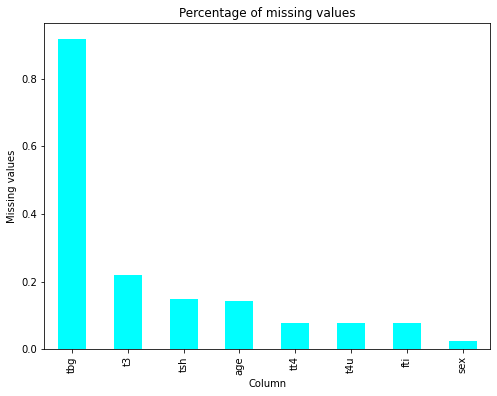

In [24]:
# Visualising the value that are missing
#
hypo_df.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'cyan')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [25]:
# Dropping columns with more than 90% of missing values
# filling the missing values
#
hypo_df.drop(['tbg', 'tbg_measured'], axis = 1, inplace = True)

# Filling missing values in the sex column with mode
#
hypo_df.sex.fillna(hypo_df.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
# using a for loop
#
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
for column in num_cols:
  hypo_df[column].fillna(hypo_df[column].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
hypo_df.isnull().sum().any()

False

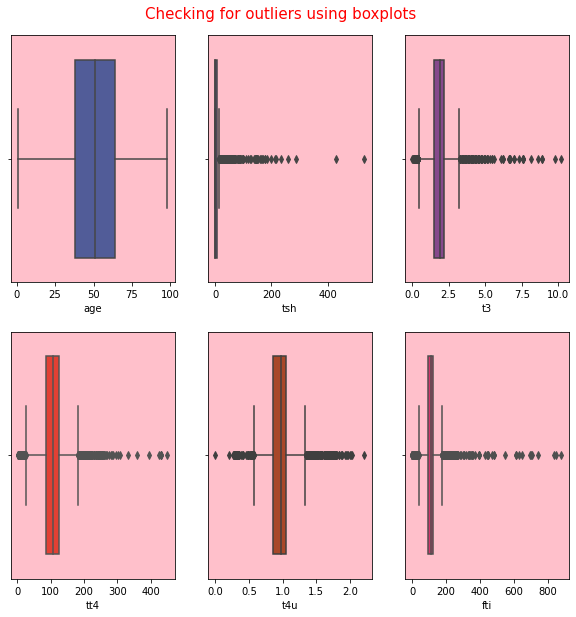

In [26]:
col_list2 = ['age',	'tsh', 't3',	'tt4',	't4u',	'fti']
colors = ['#4554A4', '#65499D', '#8F3E97', '#FF2717', '#BD3C14', '#E71F63']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), hypo_df, col_list2, colors):
  sns.boxplot(hypo_df[column], ax = ax, color = color)
  ax.set_facecolor('pink') 
  # Setting the background color to pink

## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

 [Link](http://nrvis.com/data/mldata/thyroid-disease_thyroid0387.csv).

##  Exploratory Data Analysis

### Univariate visuals and analysis

In [27]:
var = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(hypo_df[v].value_counts())


Frequency count for variable status
negative       2945
hypothyroid     141
Name: status, dtype: int64

Frequency count for variable age
51.112538    438
59.000000     63
62.000000     61
60.000000     60
72.000000     59
            ... 
4.000000       1
93.000000      1
90.000000      1
98.000000      1
97.000000      1
Name: age, Length: 93, dtype: int64

Frequency count for variable sex
F    2192
M     894
Name: sex, dtype: int64

Frequency count for variable on_thyroxine
f    2640
t     446
Name: on_thyroxine, dtype: int64

Frequency count for variable query_on_thyroxine
f    3031
t      55
Name: query_on_thyroxine, dtype: int64

Frequency count for variable on_antithyroid_medication
f    3044
t      42
Name: on_antithyroid_medication, dtype: int64

Frequency count for variable thyroid_surgery
f    2983
t     103
Name: thyroid_surgery, dtype: int64

Frequency count for variable query_hypothyroid
f    2851
t     235
Name: query_hypothyroid, dtype: int64

Frequency count for variab

In [28]:
# Descriptive summaries for the dataset
print('Variance of values in different columns')
print(hypo_df.var())
print('Skewness of values in different columns')
print(hypo_df.skew())
print('Kurtosis of values in different columns')
print(hypo_df.kurt())
print('Summary')
hypo_df.describe()

Variance of values in different columns
age     318.780701
tsh     491.996510
t3        0.747925
tt4    1834.963265
t4u       0.047034
fti    3338.640107
dtype: float64
Skewness of values in different columns
age    -0.183279
tsh    11.145457
t3      2.453770
tt4     1.528402
t4u     0.991289
fti     5.425255
dtype: float64
Kurtosis of values in different columns
age     -0.621452
tsh    180.713221
t3      14.891061
tt4      7.679570
t4u      3.970968
fti     52.799848
dtype: float64
Summary


,age,tsh,t3,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


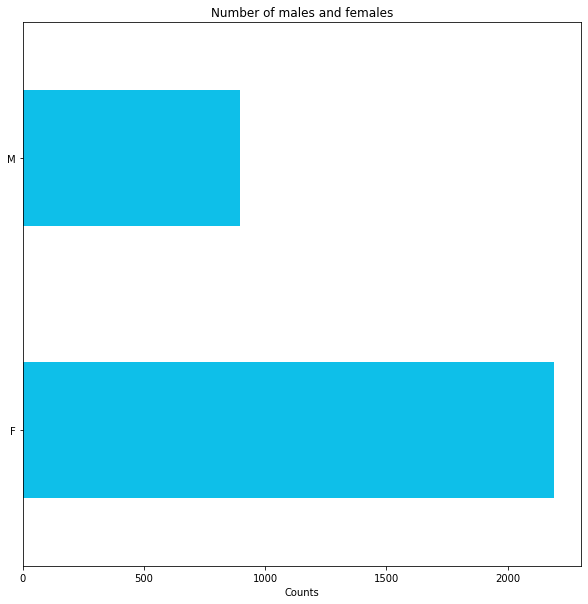

In [29]:
# the distribution of sex in the dataset
hypo_df['sex'].value_counts().plot(kind='barh', color='#0EBFE9', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number of males and females')
plt.show()

There were more females who attended the clinic camp.

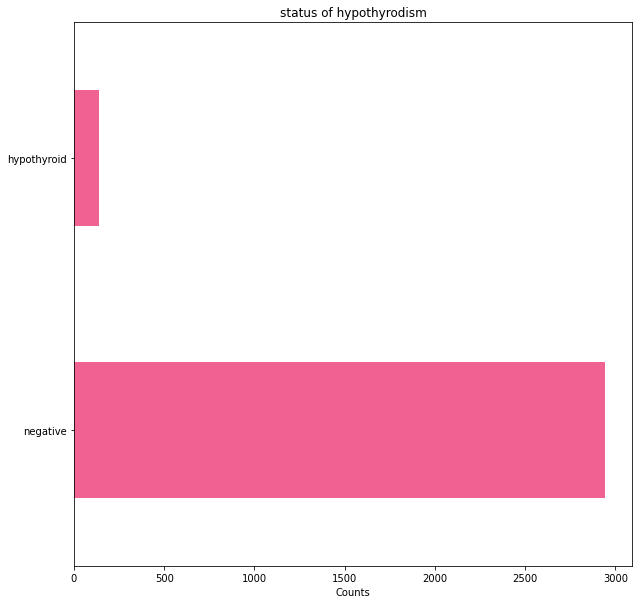

In [30]:
# status of hypothyrodism
hypo_df['status'].value_counts().plot(kind='barh', color='#F06291', figsize=(10,10))
plt.xlabel('Counts')
plt.title('status of hypothyrodism')
plt.show()

Most of the patients who attended the clinical camp had there test results negative.

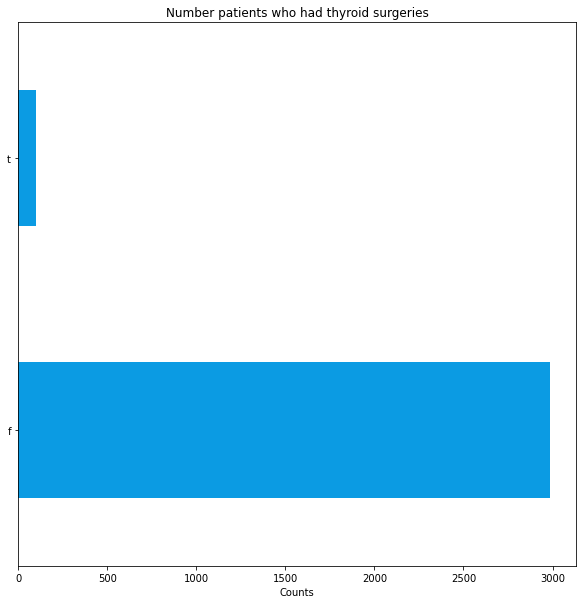

In [31]:
# distribution of thyroids surgeries
hypo_df['thyroid_surgery'].value_counts().plot(kind='barh', color='#0B9BE3', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number patients who had thyroid surgeries')
plt.show()

Those who came to be tested had never undergone thyroid surgeries.

Text(0.5, 1.0, 'Number of patients who had were on thyroxine')

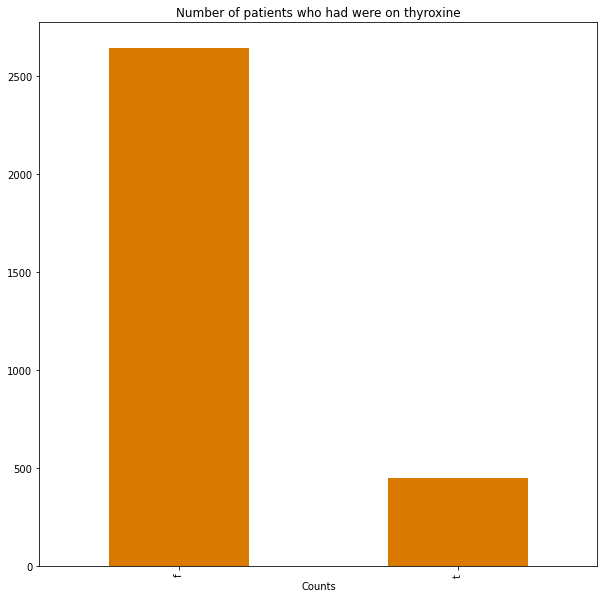

In [32]:
# distribution of patients on thyroxine
hypo_df['on_thyroxine'].value_counts().plot(kind='bar', color='#D97900', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number of patients who had were on thyroxine')

Most of the patients who came for testing were not on thyroxine.

Text(0.5, 1.0, 'Number of patients on query on thyroxine')

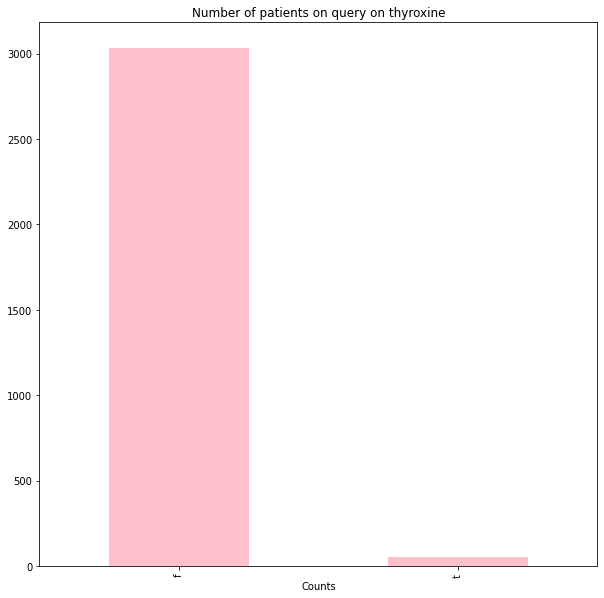

In [33]:
# patients on query on thyroxine
hypo_df['query_on_thyroxine'].value_counts().plot(kind='bar', color='pink', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number of patients on query on thyroxine')

Most patients were not on query on thyroxine.

Text(0.5, 1.0, 'Number of on antithyroid medication')

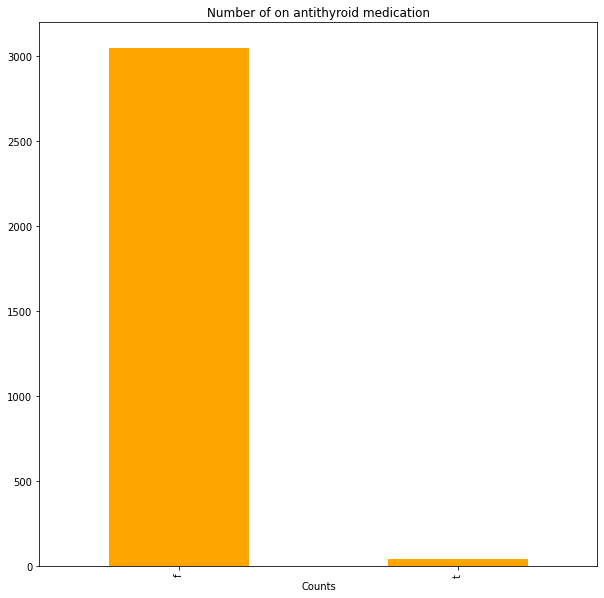

In [34]:
#patients on antithyroid medication
hypo_df['on_antithyroid_medication'].value_counts().plot(kind='bar', color='orange', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number of on antithyroid medication')

Most patients were not on antithyroid medication.

Text(0.5, 1.0, 'Numbers of query_hypothyroid')

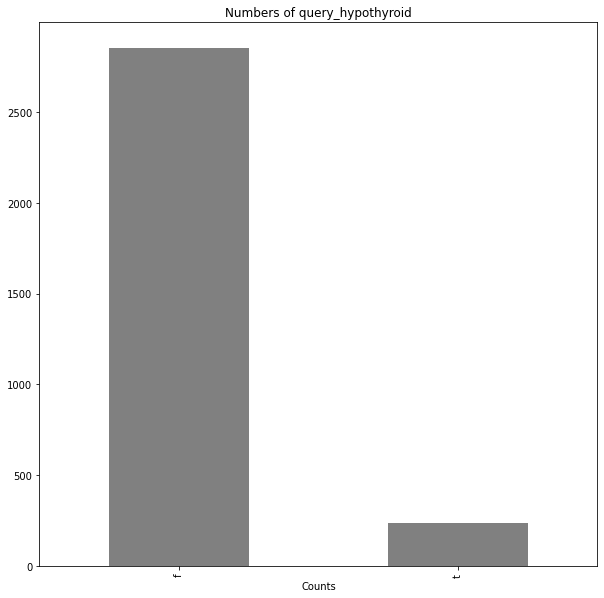

In [35]:
# distribution on query on hypothyroid in patients
hypo_df['query_hypothyroid'].value_counts().plot(kind='bar', color='grey', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Numbers of query_hypothyroid')

Most patients had not had any query on hypothyroid.

Text(0.5, 1.0, 'Numbers patients on query hyperthyroid')

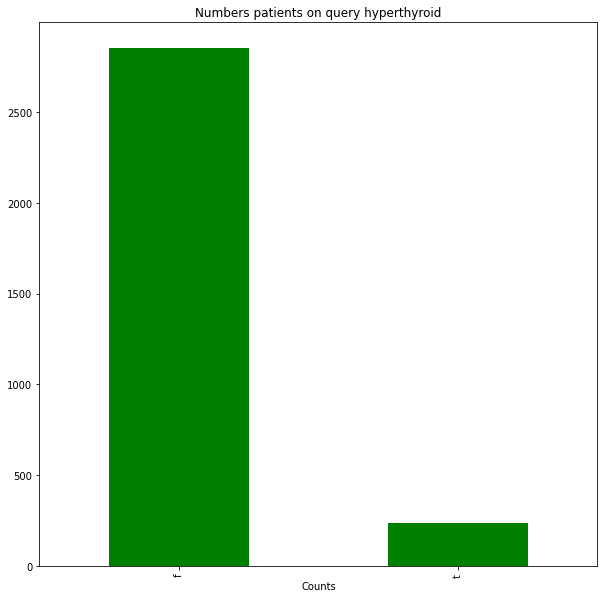

In [36]:
# distribution on query on hyperthyroid in patients
hypo_df['query_hyperthyroid'].value_counts().plot(kind='bar', color='green', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Numbers patients on query hyperthyroid')

Text(0.5, 1.0, 'Distribution of pregnant patients')

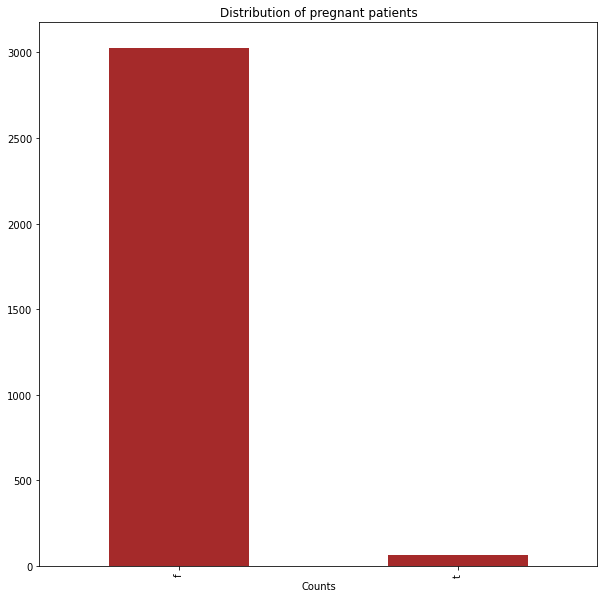

In [37]:
# distribution of pregnant patients 
hypo_df['pregnant'].value_counts().plot(kind='bar', color='brown', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Distribution of pregnant patients')

The patients who came to be tested were not pregnant.

Text(0.5, 1.0, 'Distribution of sick patients')

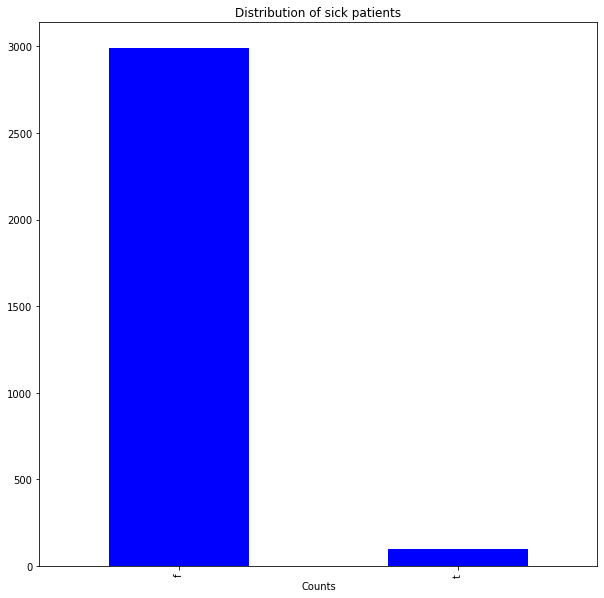

In [38]:
# distribution of pregnant patients 
hypo_df['sick'].value_counts().plot(kind='bar', color='blue', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Distribution of sick patients')

A large percentage of the  patients that came for testing were not sick.

Text(0.5, 1.0, 'Status of tumor condition')

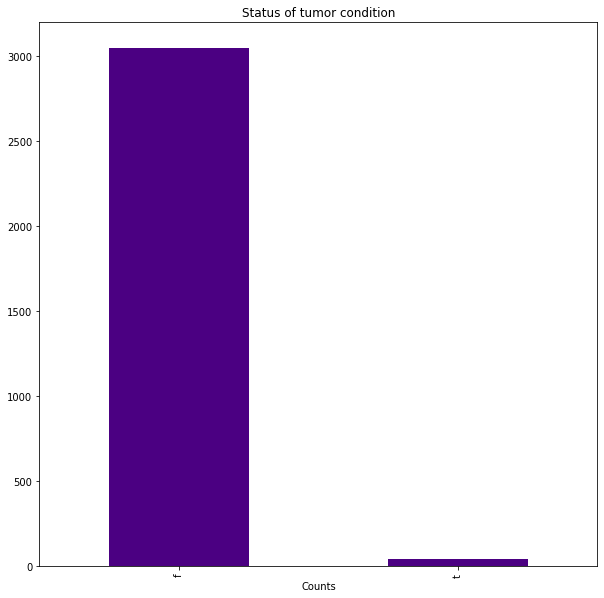

In [39]:
# status of tumor condition in the patients 
hypo_df['tumor'].value_counts().plot(kind='bar', color='indigo', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Status of tumor condition')

The patients that showed up for the hypothryroid test did not have tumors.

In [40]:
# getting the count of patients that had lithium
hypo_df.lithium.value_counts()

f    3084
t       2
Name: lithium, dtype: int64

Text(0.5, 1.0, 'Lithium in patients')

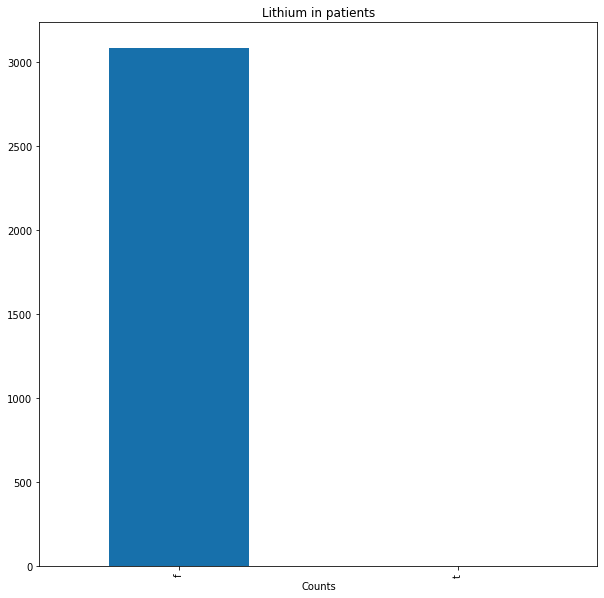

In [41]:
# Lithium in patients 
hypo_df['lithium'].value_counts().plot(kind='bar', color='#1770AB', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Lithium in patients')

All the patients with an exception of two did not have any lithium.

Text(0.5, 1.0, 'distribution of goitre condition')

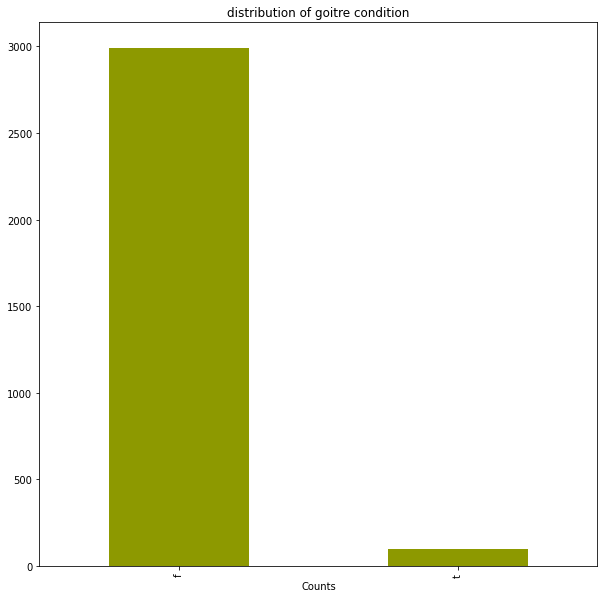

In [42]:
# patients having goitre
hypo_df['goitre'].value_counts().plot(kind='bar', color='#8D9900', figsize=(10,10))
plt.xlabel('Counts')
plt.title('distribution of goitre condition')

A large proportion of the patients did not have goitre.

Text(0.5, 1.0, 'tsh measured in patients')

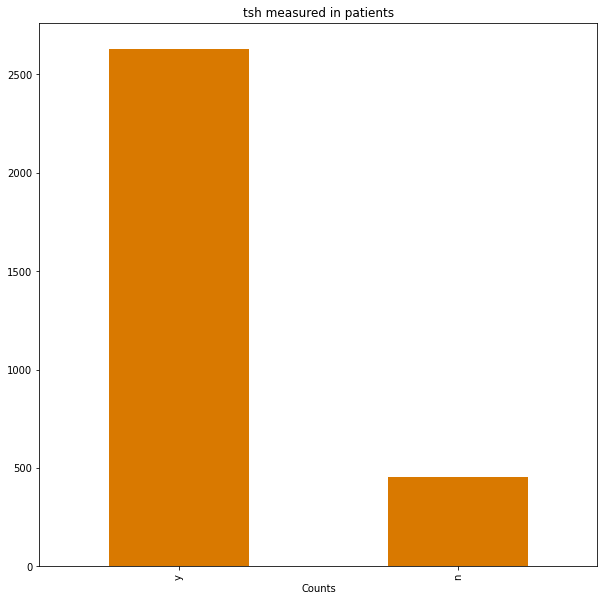

In [43]:
# tsh measured in patients
hypo_df['tsh_measured'].value_counts().plot(kind='bar', color='#D97900', figsize=(10,10))
plt.xlabel('Counts')
plt.title('tsh measured in patients')

Most of the patients had their tsh levels measured.

Text(0.5, 1.0, 't3 measured in patients')

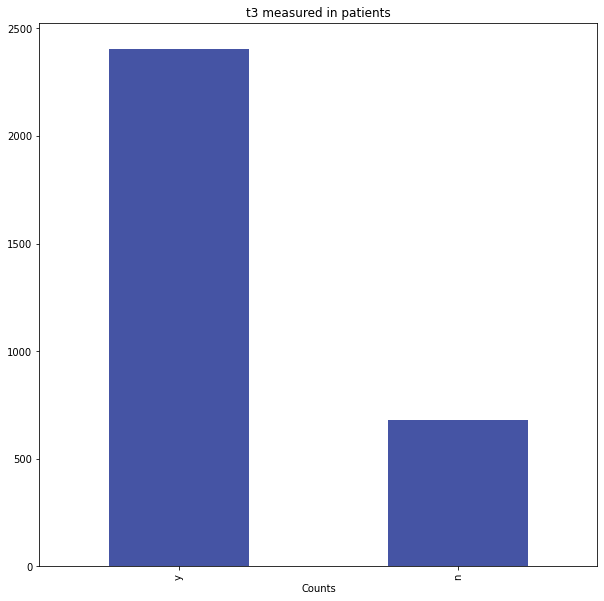

In [44]:
# t3_measured in patients
hypo_df['t3_measured'].value_counts().plot(kind='bar', color='#4554A4', figsize=(10,10))
plt.xlabel('Counts')
plt.title('t3 measured in patients')

Many of the patients had their t3 levels measured

Text(0.5, 1.0, 'tt4 measured in patients')

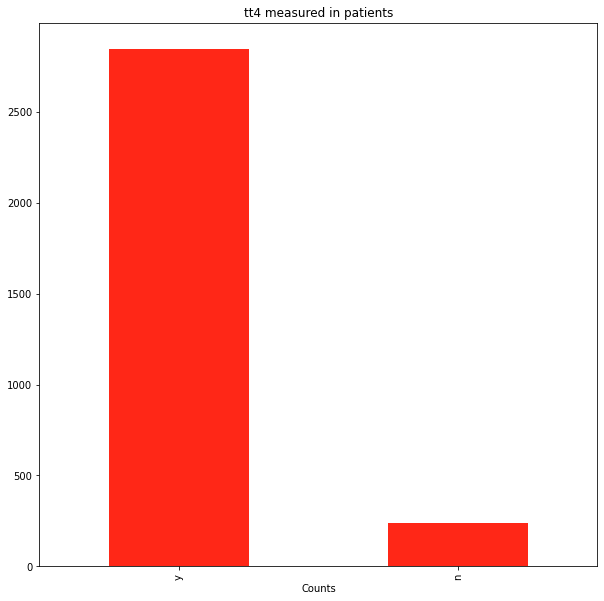

In [45]:
# tt4 measured in patients
hypo_df['tt4_measured'].value_counts().plot(kind='bar', color='#FF2717', figsize=(10,10))
plt.xlabel('Counts')
plt.title('tt4 measured in patients')

A large percentage of the patients had their tt4 levels measured.

Text(0.5, 1.0, 't4u measured in patients')

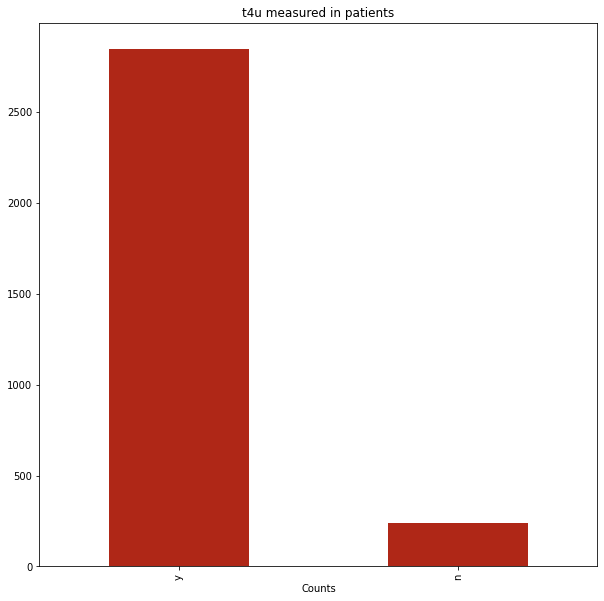

In [46]:
# tt4 measured in patients
hypo_df['t4u_measured'].value_counts().plot(kind='bar', color='#AF2717', figsize=(10,10))
plt.xlabel('Counts')
plt.title('t4u measured in patients')

Most of the patients had their t4u levels measured during the cinic camp.

Text(0.5, 1.0, 'fti measured in patients')

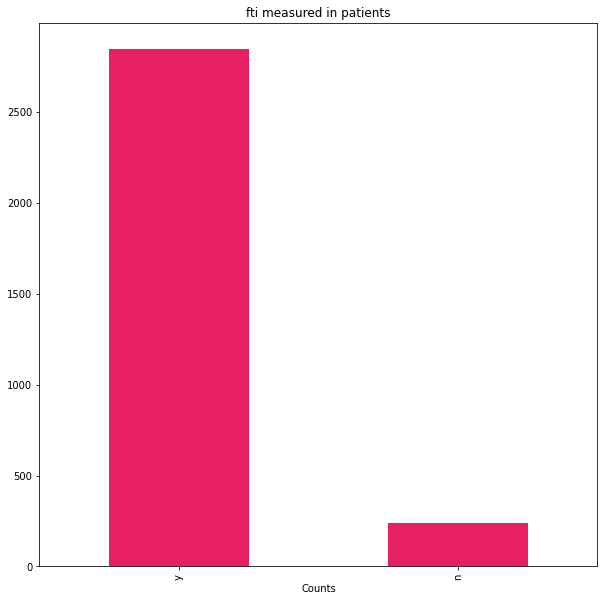

In [47]:
# fti measured in patients
hypo_df['fti_measured'].value_counts().plot(kind='bar', color='#E71F63', figsize=(10,10))
plt.xlabel('Counts')
plt.title('fti measured in patients')

Most patients got their fti levels measured

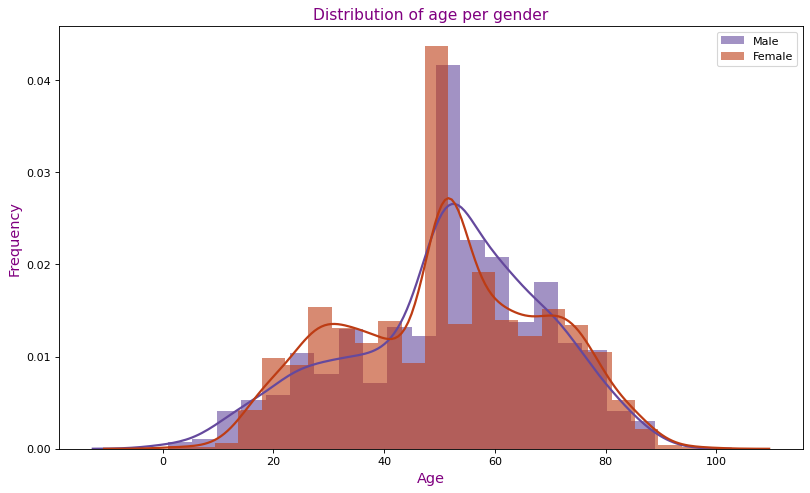

In [48]:
# Plotting histogram to show distribution of age per gender
# 
male = hypo_df.loc[hypo_df.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = hypo_df.loc[hypo_df.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="#65499D", label="Male", **kwargs)
sns.distplot(female, color="#BD3C14", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

For both sexe the age distributio is skewed to the right. It is correct to conclude that the modes and medians are greater than the means.

From the univariate summaries made and the visual output it is clearly evident that this dataset is unbalanced. There is need to ensure balancing of the classes so that accurate conclusions are made from the analysis.

### Bivariate visuals and analysis

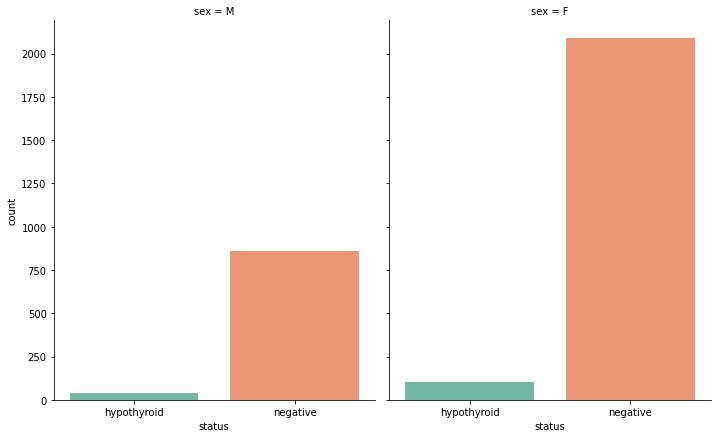

In [49]:
# Plotting bar charts to show distribution of the status of Hypothyrodism by sex
#
sns.catplot("status", col="sex", col_wrap=4, data=hypo_df, kind="count", height=6, aspect=.8, palette='Set2')
plt.show()

Females had a greater number of hypothyrodic cases.

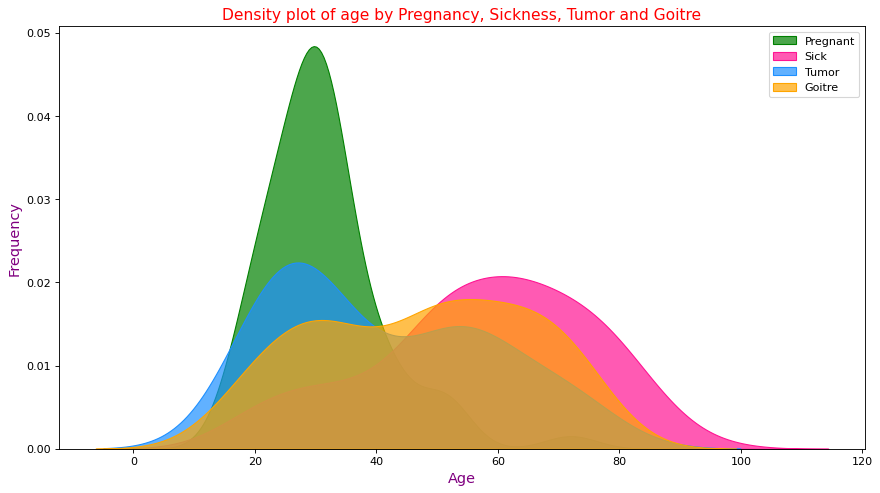

In [50]:
# Plotting probability desnities for pregnant, sick, tumor and goitre persons
# Setting the figuresize of the graph to 13 in length and 7 in height
#
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(hypo_df.loc[hypo_df['pregnant'] == "t", "age"], shade=True, color="g", label="Pregnant", alpha=.7)
sns.kdeplot(hypo_df.loc[hypo_df['sick'] == "t", "age"], shade=True, color="deeppink", label="Sick", alpha=.7)
sns.kdeplot(hypo_df.loc[hypo_df['tumor'] == "t", "age"], shade=True, color="dodgerblue", label="Tumor", alpha=.7)
sns.kdeplot(hypo_df.loc[hypo_df['goitre'] == "t", "age"], shade=True, color="orange", label="Goitre", alpha=.7)
plt.title('Density plot of age by Pregnancy, Sickness, Tumor and Goitre', fontsize=14, color = 'red')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', color = 'purple', fontsize = 13)
plt.legend()
plt.show()

From the above chart, comparing alongside the named attributes. It is evident that:

Most pregnant women lie between the ages of approximately 18 and 40.

The distribution is skewed to the left for sick people.

Distribution of people with goitre and tumor tends to normal.

<Figure size 480x320 with 0 Axes>

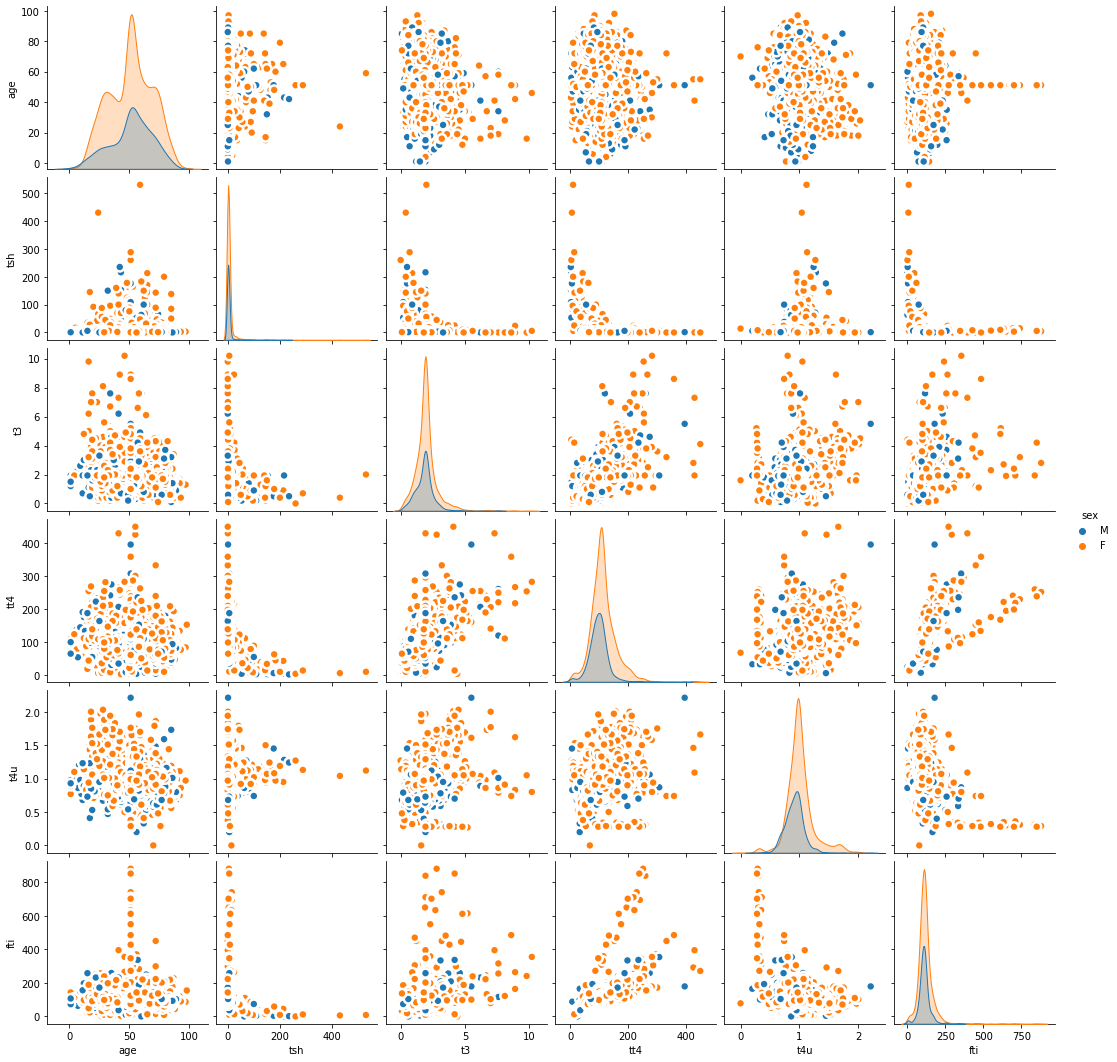

In [51]:
# plotting plots for the data based on the sex
plt.figure(dpi= 80)
sns.pairplot(hypo_df, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

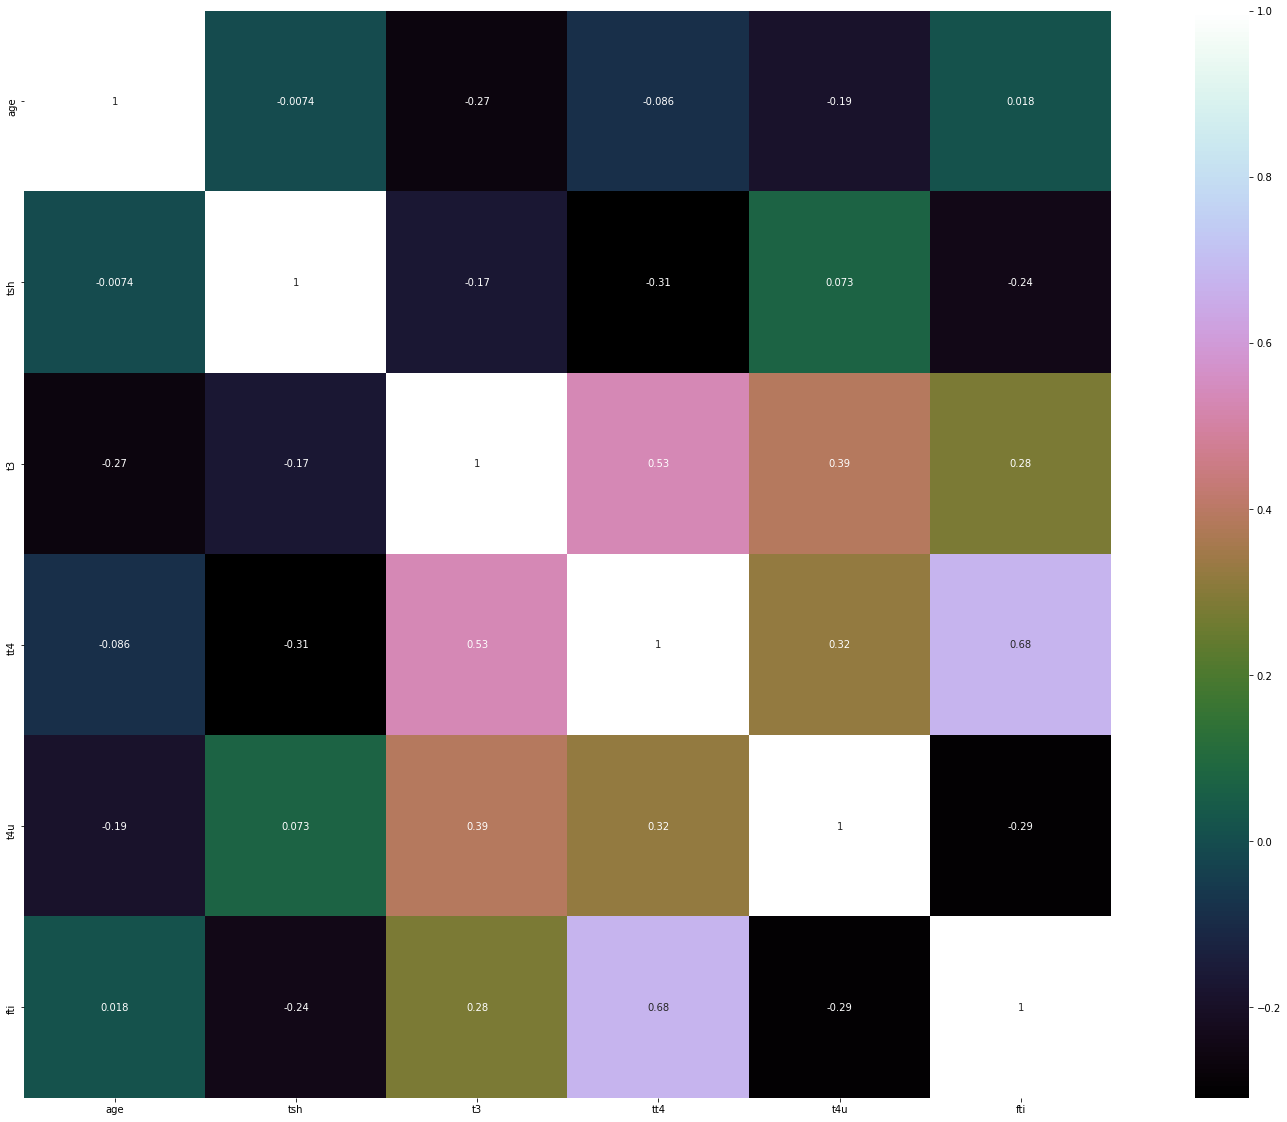

In [52]:
# Getting Correllation matrix
corr_mat=hypo_df.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

It is evident that there is a relatively strong correlation between:
* fti and tt4
* t3 and tt4

In [53]:
# changing the categorical data to have numerical codes
#Converting the string data types to values so that we could use them in modelling
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

hypo_df['status'] = en.fit_transform(hypo_df['status'])
hypo_df['sex'] = en.fit_transform(hypo_df['sex'])

hypo_df['on_thyroxine'] = en.fit_transform(hypo_df['on_thyroxine'])
hypo_df['query_on_thyroxine'] = en.fit_transform(hypo_df['query_on_thyroxine'])

hypo_df['on_antithyroid_medication'] = en.fit_transform(hypo_df['on_antithyroid_medication'])
hypo_df['thyroid_surgery'] = en.fit_transform(hypo_df['thyroid_surgery'])

hypo_df['query_hypothyroid'] = en.fit_transform(hypo_df['query_hypothyroid'])
hypo_df['query_hyperthyroid'] = en.fit_transform(hypo_df['query_hyperthyroid'])

hypo_df['pregnant'] = en.fit_transform(hypo_df['pregnant'])
hypo_df['sick'] = en.fit_transform(hypo_df['sick'])
hypo_df['tumor'] = en.fit_transform(hypo_df['tumor'])
hypo_df['lithium'] = en.fit_transform(hypo_df['lithium'])
hypo_df['goitre'] = en.fit_transform(hypo_df['goitre'])
hypo_df['tsh_measured'] = en.fit_transform(hypo_df['tsh_measured'])
hypo_df['t3_measured'] = en.fit_transform(hypo_df['t3_measured'])
hypo_df['tt4_measured'] = en.fit_transform(hypo_df['tt4_measured'])
hypo_df['t4u_measured'] = en.fit_transform(hypo_df['t4u_measured'])
hypo_df['fti_measured'] = en.fit_transform(hypo_df['fti_measured'])

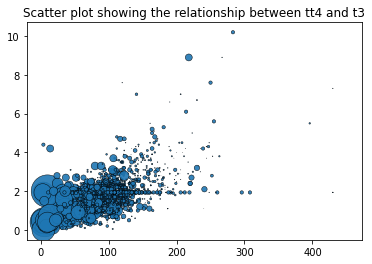

In [54]:
# a scatter plot shwing the relationship between tt4 and t3
plt.scatter('tt4', 't3', s=hypo_df.tsh*2, alpha=.9, data=hypo_df, cmap="Set2", edgecolors='black', linewidths=.5)
plt.title('Scatter plot showing the relationship between tt4 and t3')
plt.show()

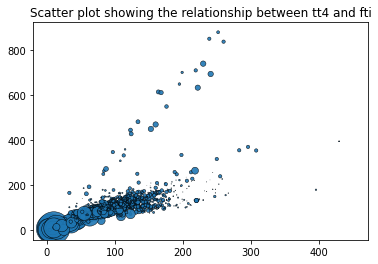

In [55]:
# a scatter plot shwing the relationship between tt4 and fti
plt.scatter('tt4', 'fti', s=hypo_df.tsh*2, alpha=.9, data=hypo_df, cmap="Set2", edgecolors='black', linewidths=.5)
plt.title('Scatter plot showing the relationship between tt4 and fti')
plt.show()

In [56]:
#get the correlation of each feature with the target variable
corr = pd.DataFrame(hypo_df.corr()['status'])
#get the absolute value of the correlation
corr['abs'] = np.abs(corr['status'])
#sorting the values by their absolute value, in descending order
corr = corr.sort_values(by='abs',ascending=False)
corr
#

,status,abs
status,1.000000,1.000000
tsh,-0.586256,0.586256
tt4,0.375957,0.375957
fti,0.311517,0.311517
t3,0.185408,0.185408
tsh_measured,-0.086617,0.086617
t4u,-0.085123,0.085123
t3_measured,-0.067653,0.067653
tt4_measured,-0.063541,0.063541
t4u_measured,-0.063397,0.063397


The variables that are mostly correlated with the status of hypothyrodism are tsh, tt4, t3 and fti.

### Random Forest

In [57]:
# random forest without hyper parameters tuning
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y = hypo_df['status'].values


test_features =hypo_df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypo_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,  stratify= hypo_df['status'])


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.954644,0.951665
std,0.208197,0.197681
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [58]:
# checiking how the model scored in being accurate
forest.score(X_test, y_test)

0.8700477695779166

In [59]:
# assessing how well the random forest is doing
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# rmse should be less than 10% of what we are predicting

Mean Absolute Error: 0.012589992800575956
Mean Squared Error: 0.005626823854091673
Root Mean Squared Error: 0.07501215804182461


From the output above the RMSE is less than 10% of what we are predicting which shows that the model has performed fairly well.

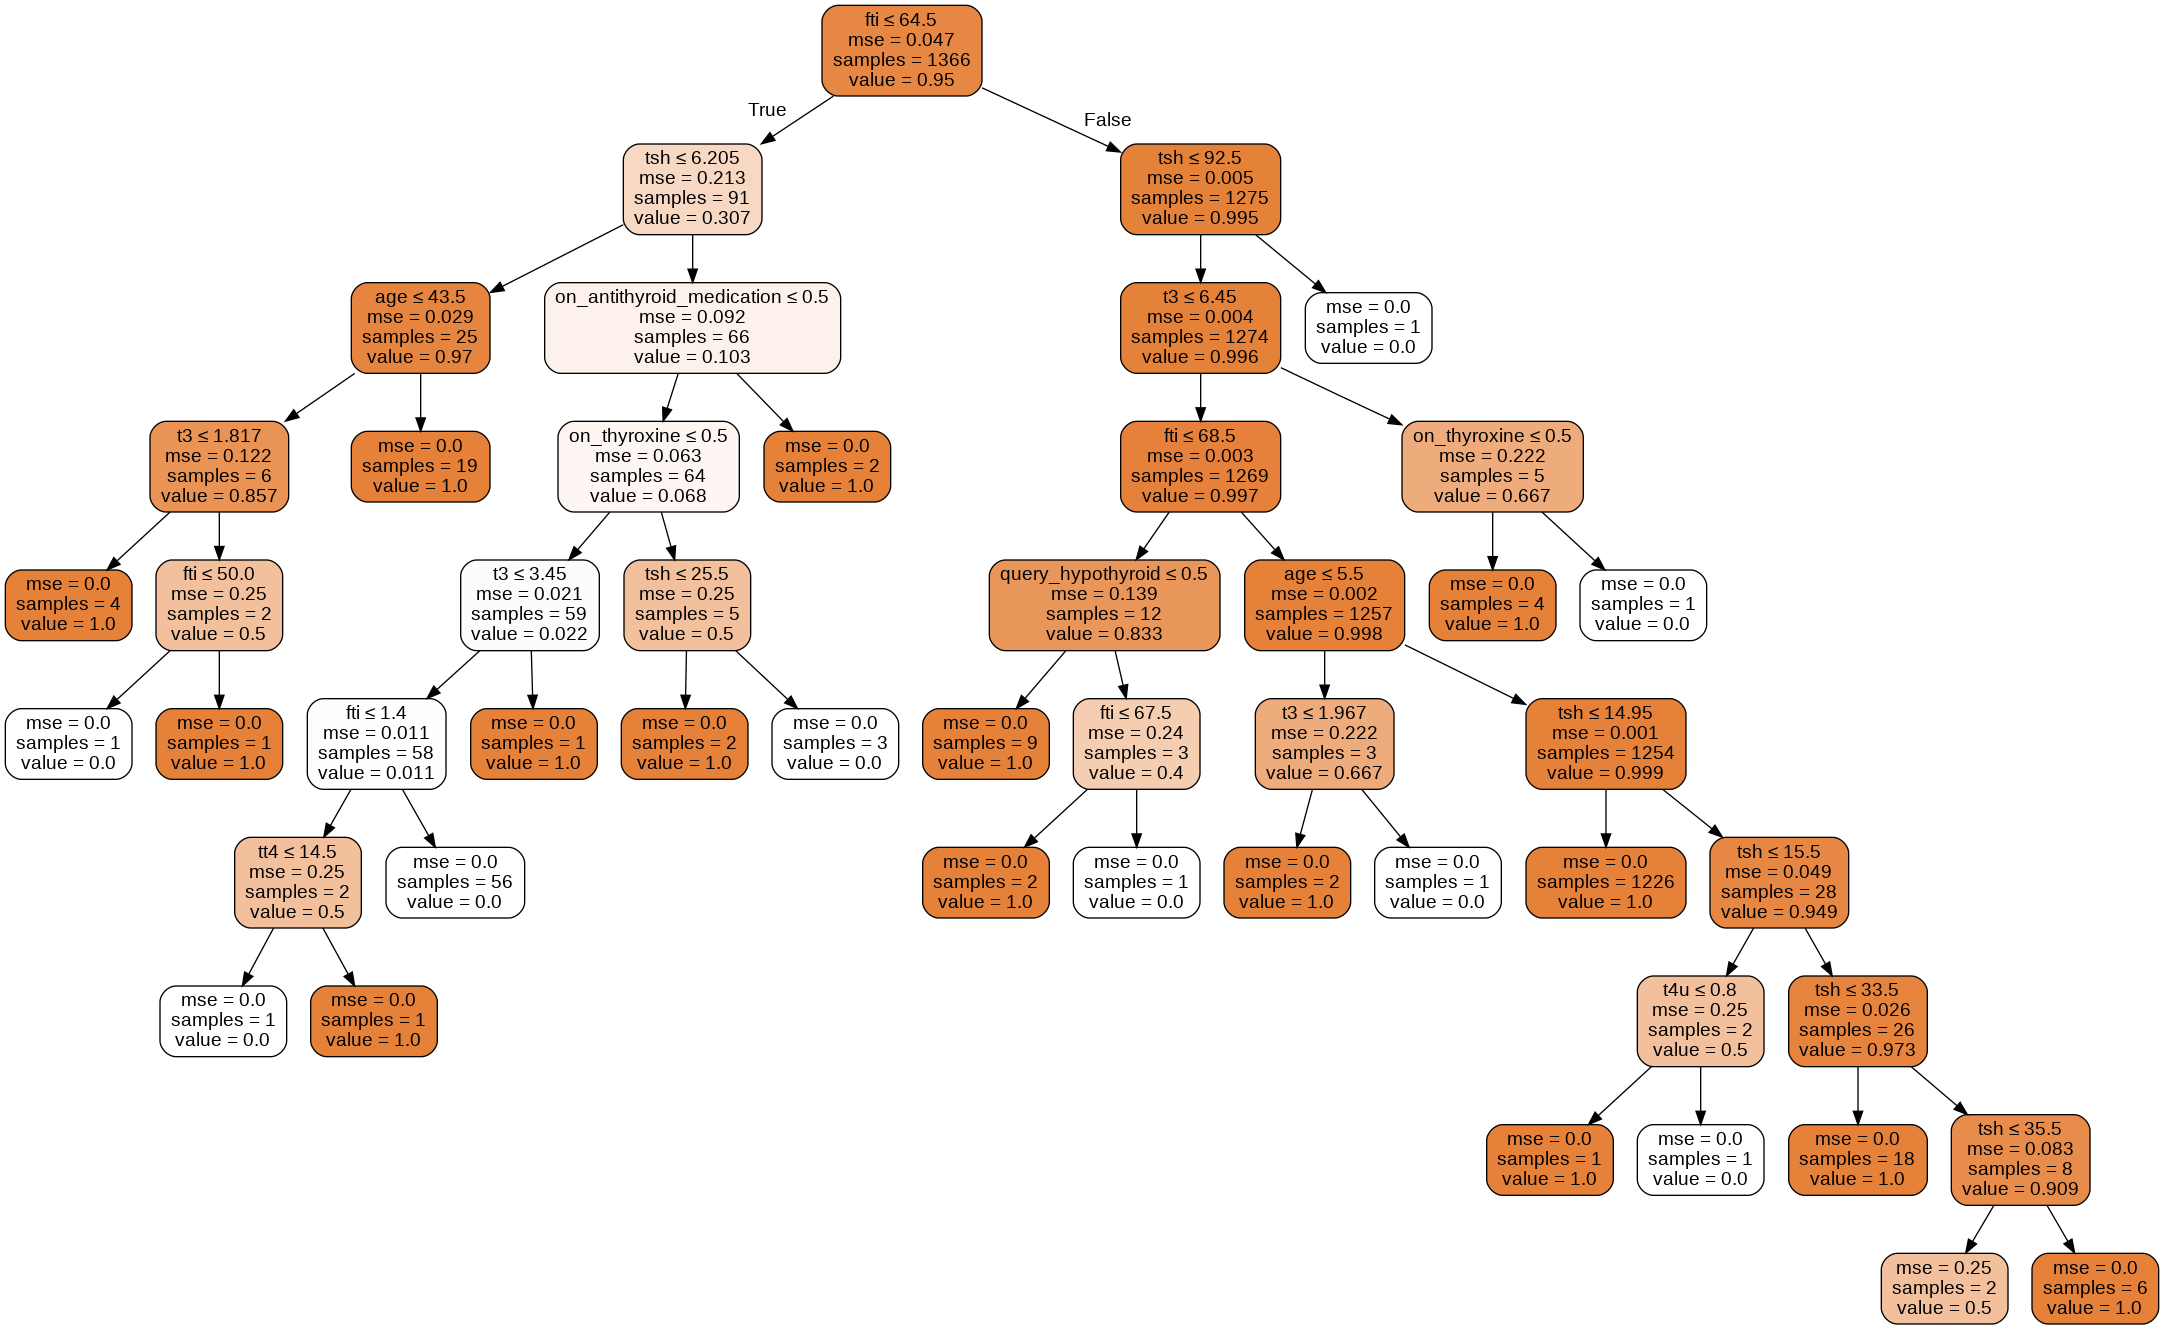

In [60]:
# Visualizing the model using 50 trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypo1_forest.png')
Image(graph.create_png())


In [61]:
#With Hyper Parameter Tuning
# finding the best parameters
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params ={ 'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'max_depth':[1,2,3,4,5,6],
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.9913606911447084
Confusion Metrix:
 [[ 37   3]
 [  5 881]]


The model here performed really way and this signifies the occurence of overfitting in the model.Reducing the features and using the best parameters.

In [62]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.0044), ('sex', 0.0), ('on_thyroxine', 0.0402), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0331), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0128), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.2316), ('t3_measured', 0.0), ('t3', 0.0293), ('tt4_measured', 0.0), ('tt4', 0.0049), ('t4u_measured', 0.0), ('t4u', 0.0049), ('fti_measured', 0.0), ('fti', 0.6387)]

Variable: fti                  Importance: 0.6387
Variable: tsh                  Importance: 0.2316
Variable: on_thyroxine         Importance: 0.0402
Variable: on_antithyroid_medication Importance: 0.0331
Variable: t3                   Importance: 0.0293
Variable: query_hypothyroid    Importance: 0.0128
Variable: tt4                  Importance: 0.0049
Variable: t4u                  Importance: 0.0049
Variable: age                  Importance: 0.0044
Variable: sex                  Importance: 0.0
Va

From the output above, the most important feature are:
* fti
* tsh
* on_thyroxine
* on_antithyroid_medication
* t3
* query_hypothyroid
* tt4
* t4u
* age     

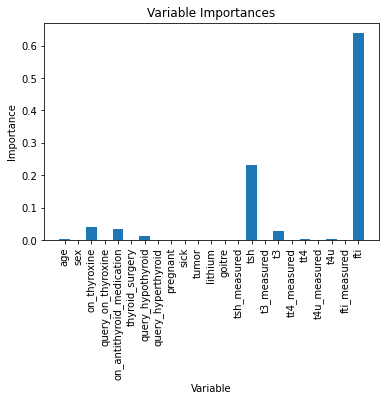

In [63]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Modelling using the most important features and the best parameters

In [64]:
# carrying out the model using the most useful features obtained from the feature importance
# inputing the best paramaters
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y1 = hypo_df['status'].values

test_feature1 = ['fti' , 'tsh', 'on_thyroxine', 'on_antithyroid_medication', 't3', 'query_hypothyroid', 'tt4', 't4u', 'age']

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X1 = hypo_df[test_feature1].values

# Train using 80% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify= hypo_df['status'])

# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 20, max_depth=6, min_samples_leaf= 2, random_state=123, min_samples_split = 5, n_jobs= -1)
forest = forest.fit(X1_train, y1_train)

# Predict based on the model we've trained
y_pred1 = forest.predict(X1_test)

comparison_frame1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y_pred1.flatten()})

print(comparison_frame1.describe())

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)))
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y1_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y1_test))


           Actual   Predicted
count  926.000000  926.000000
mean     0.954644    0.951713
std      0.208197    0.193160
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Mean Absolute Error: 0.014432695991653125
Mean Squared Error: 0.005747912275435939
Root Mean Squared Error: 0.075814987142622
Accuracy: 0.9913606911447084
Confusion Metrix:
 [[ 37   3]
 [  5 881]]


In [65]:
# checiking how the model scored in being accurate
f= forest.score(X1_test, y1_test)
f

0.867251216701904

Looking at the output with the attributes that had the highest feature importance and the best parameters the model produce an RMSE having 10% less of the predicted attribute. The model has performed well. In addition the false prediction are a less percentage looking at the confusion matrix.


The score slightly reduced from 87% without hyper parameter tuning to 86.81%.

### Ada Boost

In [66]:
# performing Ada boosting on the data without hyper parameter tuning
y = hypo_df['status'].values


test_features =hypo_df.columns.to_list()
test_features.remove('status')


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypo_df[test_features].values

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])

# Instantiating the model
#
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0)
model = ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)



# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#importing the metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred,y_test))


Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577
Root Mean Squared Error: 0.09294788246803462
Accuracy: 0.9913606911447084
Confusion Metrix:
 [[ 37   3]
 [  5 881]]


In [67]:
# Get numerical feature importances
importances = list(ada.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.16), ('sex', 0.0), ('on_thyroxine', 0.02), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.02), ('query_hyperthyroid', 0.02), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.24), ('t3_measured', 0.0), ('t3', 0.12), ('tt4_measured', 0.0), ('tt4', 0.16), ('t4u_measured', 0.0), ('t4u', 0.1), ('fti_measured', 0.0), ('fti', 0.14)]

Variable: tsh                  Importance: 0.24
Variable: age                  Importance: 0.16
Variable: tt4                  Importance: 0.16
Variable: fti                  Importance: 0.14
Variable: t3                   Importance: 0.12
Variable: t4u                  Importance: 0.1
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: query_hypothyroid    Importance: 0.02
Variable: query_hyperthyroid   Importance: 0.02
Variable: sex                  Importa

From the above output, the most important features are:

age, on_thyroxine, on_antithyroid_medication, query_hypothyroid, query_hyperthyroid,tsh, t3, tt4, t4u, fti

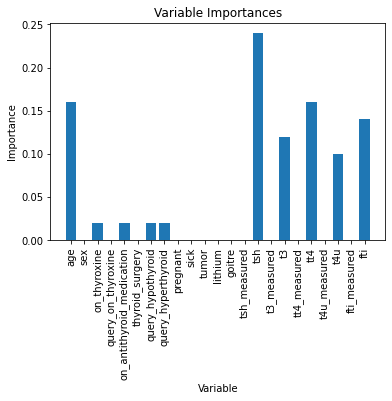

In [68]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Ada Boost has 10 important features while those that random forest had were 9.

Performing the model once again with the most important features.

In [69]:
# performing Ada boosting with the most important features
y2 = hypo_df['status'].values

test_feature2 =['age', 'on_thyroxine', 'on_antithyroid_medication', 'query_hypothyroid', 'query_hyperthyroid', 'tsh', 't3', 'tt4', 't4u', 'fti']
X2 = hypo_df[test_feature2].values
# Splitting the data into training and testing sets
#
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])

# Instantiating the model
#
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0)
model = ada.fit(X2_train, y2_train)

# Making predictions
#
y_pred2 = ada.predict(X2_test)


# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_pred2,y2_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred2,y2_test))


Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577
Root Mean Squared Error: 0.09294788246803462
Accuracy: 0.9913606911447084
Confusion Metrix:
 [[ 37   3]
 [  5 881]]


There is a slight improvement in the accuracy of the model upon carrying out using the best features.

In [70]:
 # to preview the parameter that is going to be tuned
 AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [71]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X2, y2)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 100}


In [72]:
# performing Ada boosting on the data with  hyper parameter tuning
y2 = hypo_df['status'].values

test_feature2 =['age', 'on_thyroxine', 'on_antithyroid_medication', 'query_hypothyroid', 'query_hyperthyroid', 'tsh', 't3', 'tt4', 't4u', 'fti']
X2 = hypo_df[test_feature2].values
# Splitting the data into training and testing sets
#
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])

# Instantiating the model
#
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate= 1, n_estimators = 30,random_state = 0)
model = ada.fit(X2_train, y2_train)

# Making predictions
#
y_pred2 = ada.predict(X2_test)


# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_pred2,y2_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_pred2,y2_test))

Mean Absolute Error: 0.00755939524838013
Mean Squared Error: 0.00755939524838013
Root Mean Squared Error: 0.08694478275537947
Accuracy: 0.9924406047516199
Confusion Metrix:
 [[ 38   3]
 [  4 881]]


The accuracy upon fitting the bset parameters into the model has further improved.

Gradient Boost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate  #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  #Performing grid search

In [75]:
y = hypo_df['status'].values

test_features =hypo_df.columns.to_list()
test_features.remove('status')


X = hypo_df[test_features].values
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])


In [76]:
# gradient boosting without any hyper parameter tuning
gb_clf2 = GradientBoostingClassifier( random_state=0)
mod2= gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Getting the score
print(mod2.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Mean Absolute Error: 0.00755939524838013
Mean Squared Error: 0.00755939524838013
Root Mean Squared Error: 0.08694478275537947
0.9924406047516199
Confusion Matrix:
[[ 39   3]
 [  4 880]]


In [77]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.960
Accuracy score (validation): 0.958
Learning rate:  0.075
Accuracy score (training): 0.965
Accuracy score (validation): 0.959
Learning rate:  0.1
Accuracy score (training): 0.977
Accuracy score (validation): 0.976
Learning rate:  0.25
Accuracy score (training): 0.986
Accuracy score (validation): 0.982
Learning rate:  0.5
Accuracy score (training): 0.987
Accuracy score (validation): 0.982
Learning rate:  0.75
Accuracy score (training): 0.985
Accuracy score (validation): 0.977
Learning rate:  1
Accuracy score (training): 0.233
Accuracy score (validation): 0.246


From the output above a learning rate equivalent to 1 would give the best results!

carrying out feature importance for gradient boosting

In [78]:
# Get numerical feature importances
importances = list(gb_clf.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0005), ('sex', 0.0002), ('on_thyroxine', 0.0001), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0006), ('thyroid_surgery', 0.0001), ('query_hypothyroid', 0.0022), ('query_hyperthyroid', 0.0028), ('pregnant', 0.0), ('sick', 0.0463), ('tumor', 0.0), ('lithium', 0.0001), ('goitre', 0.0006), ('tsh_measured', 0.4745), ('tsh', 0.0157), ('t3_measured', 0.0852), ('t3', 0.0234), ('tt4_measured', 0.0), ('tt4', 0.1235), ('t4u_measured', 0.0), ('t4u', 0.0036), ('fti_measured', 0.1232), ('fti', 0.0973)]

Variable: tsh_measured         Importance: 0.4745
Variable: tt4                  Importance: 0.1235
Variable: fti_measured         Importance: 0.1232
Variable: fti                  Importance: 0.0973
Variable: t3_measured          Importance: 0.0852
Variable: sick                 Importance: 0.0463
Variable: t3                   Importance: 0.0234
Variable: tsh                  Importance: 0.0157
Variable: t4u                  Importance: 0.0036
Variable: query_hyperthyroi

The most important features for gradient boosting are:
thyroid_surgery, sick, query_hyperthyroid, query_hypothyroid, query_hyperthyroid, on_antithyroid_medication, query_on_thyroxine, lithium,on_thyroxine, age, tsh_measured, tt4, fti_measured, t3_measured, sick, t3, t4u,goitre and sex.

In [79]:
# gradient boosting with hyper parameter tuning and most important features

# performing Ada boosting on the data with  hyper parameter tuning
y2 = hypo_df['status'].values

test_feature2 = ['thyroid_surgery', 'sick', 'query_hyperthyroid', 'query_hypothyroid', 'query_hyperthyroid', 'on_antithyroid_medication', 'query_on_thyroxine', 'lithium','on_thyroxine', 'age', 'tsh_measured', 'tt4', 'fti_measured', 't3_measured', 'sick', 't3', 't4u', 'goitre', 'sex']
X2 = hypo_df[test_feature2].values
# Splitting the data into training and testing sets
#
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])



gb_clf2 = GradientBoostingClassifier( n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
mod2= gb_clf2.fit(X2_train, y2_train)
predictions2 = gb_clf2.predict(X2_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))
#Getting the score
print(mod2.score(X2_test, y2_test))
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y2_test, predictions2))

Mean Absolute Error: 0.04535637149028078
Mean Squared Error: 0.04535637149028078
Root Mean Squared Error: 0.21297035354781374
0.9546436285097192
Confusion Matrix:
[[  0  42]
 [  0 884]]


from the output above the gradient boost model, performed well with the best parameters and the most important features.

### SVM

The goal of the SVM is to train a model that assigns new unseen objects into a particular category. It achieves this by creating a linear partition of the feature space into two categories. Based on the features in the new unseen objects

In [93]:
from sklearn.decomposition import PCA
# Removing the target column
hypo = hypo_df.drop('status', axis=1)
y = hypo_df['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(hypo_df)
X = pca.transform(hypo_df)
X.shape

(3086, 2)

In [83]:
#Without Hyper Parameters Tuning



# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])
#importing module
from sklearn import svm
#making the instance
model = svm.SVC(random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9848812095032398
Confusion Metrix:
 [[ 30   2]
 [ 12 882]]


In [90]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')
# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
# Removing the target column

  y = hypo_df['status']

  # Applying the reduction algorithm: PCA
  pca = PCA(n_components=2).fit(hypo_df)
  X = pca.transform(hypo_df)


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify= hypo_df['status'])
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9773218142548596 and the f1 score is: 0.988235294117647
The accuracy score of Linear     is: 0.9773218142548596 and the f1 score is: 0.9882220975883342
The accuracy score of Rbf        is: 0.9870410367170627 and the f1 score is: 0.9932356257046223


In [99]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel']

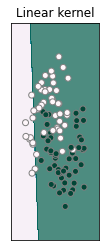

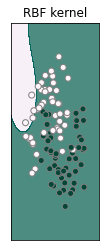

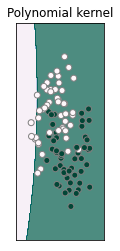

In [104]:
for i, clf in enumerate((linear, rbf, poly)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(1, 3, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,  edgecolors='grey')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

Conclusion

In classifying the best moedl in determining whether a patient is hypothyrodic or not is the gradient boost method which did not overfit after altering the best parameters and most i,portant features in to the model.